# Sistema de Detecção de Malware Polimórfico Controlado por LLM
# Treinamento do Modelo Defensivo - VERSÃO OTIMIZADA

Este notebook contém o treinamento **otimizado** do modelo de detecção de malware keylogger polimórfico baseado no framework teórico-prático com Random Forest e MALAPI2019.

**Melhorias Implementadas:**
- ✅ Pré-processamento aprimorado para dados pequenos
- ✅ Balanceamento inteligente do dataset
- ✅ Feature engineering avançada
- ✅ Otimização de hiperparâmetros
- ✅ Validação robusta

**Objetivo:** Treinar um modelo capaz de identificar malware keylogger polimórfico com métricas superiores a 80% de accuracy.

## 1. Importação de Bibliotecas e Configuração Inicial

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalação de dependências específicas para Google Colab
!pip install xgboost
!pip install shap
!pip install joblib
!pip install imbalanced-learn

# Importações principais
import pandas as pd
import numpy as np
import joblib
import warnings
from datetime import datetime, timedelta
import json
from pathlib import Path
import logging
from collections import defaultdict, Counter

# Bibliotecas de ML
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Balanceamento de dados
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Interpretabilidade
import shap

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 2. Classe Otimizada do Sistema de Detecção

In [3]:
class OptimizedMalwareDetectionSystem:
    """
    Sistema Otimizado de Detecção de Malware Polimórfico
    Implementa múltiplas melhorias para datasets pequenos
    """

    def __init__(self, config_path=None):
        self.config = self._load_optimized_config(config_path)
        self.model = None
        self.vectorizer = None
        self.dimensionality_reducer = None
        self.scaler = RobustScaler()  # Mais robusto para outliers
        self.label_encoder = LabelEncoder()
        self.feature_selector = None
        self.shap_explainer = None
        self.balancer = None

        # Métricas detalhadas
        self.training_metrics = {}

        self._setup_logging()

    def _load_optimized_config(self, config_path):
        """Configurações otimizadas para datasets pequenos"""
        optimized_config = {
            'vectorization': {
                'method': 'tfidf',  # 'tfidf', 'count', 'hybrid'
                'max_features': 5000,  # Reduzido para dataset pequeno
                'ngram_range': (1, 3),  # Incluir trigramas
                'min_df': 1,  # Mais permissivo para dataset pequeno
                'max_df': 0.9,
                'analyzer': 'word'
            },
            'feature_selection': {
                'method': 'mutual_info',  # 'mutual_info', 'chi2', 'model_based'
                'k_best': 500,  # Reduzido significativamente
                'threshold': 'median'
            },
            'dimensionality_reduction': {
                'method': 'pca',  # 'pca', 'svd', 'none'
                'n_components': 0.90,  # 90% da variância
                'random_state': 42
            },
            'balancing': {
                'method': 'smote',  # 'smote', 'random_over', 'smoteenn'
                'random_state': 42,
                'k_neighbors': 3  # Reduzido para dataset pequeno
            },
            'random_forest': {
                'n_estimators': 200,  # Reduzido para evitar overfitting
                'max_depth': 10,      # Limitado para dataset pequeno
                'min_samples_split': 10,  # Aumentado para evitar overfitting
                'min_samples_leaf': 5,    # Aumentado para evitar overfitting
                'criterion': 'gini',
                'max_features': 'sqrt',   # Mais conservativo
                'random_state': 42,
                'n_jobs': -1,
                'class_weight': 'balanced'  # Importante para dados desbalanceados
            },
            'xgboost': {
                'n_estimators': 150,
                'max_depth': 4,       # Reduzido para evitar overfitting
                'learning_rate': 0.05,  # Mais conservativo
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'reg_alpha': 0.1,     # Regularização L1
                'reg_lambda': 0.1,    # Regularização L2
                'random_state': 42,
                'scale_pos_weight': 1  # Será ajustado baseado no balanceamento
            },
            'logistic_regression': {
                'C': 1.0,
                'penalty': 'l2',
                'solver': 'liblinear',
                'random_state': 42,
                'class_weight': 'balanced'
            }
        }

        if config_path and Path(config_path).exists():
            with open(config_path, 'r') as f:
                user_config = json.load(f)
            optimized_config.update(user_config)

        return optimized_config

    def _setup_logging(self):
        """Configurar sistema de logging"""
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)

print("✅ Classe OptimizedMalwareDetectionSystem definida!")

✅ Classe OptimizedMalwareDetectionSystem definida!


## 3. Métodos de Carregamento e Análise Otimizada

In [4]:
def load_and_analyze_dataset(self, dataset_path):
    """
    Carregamento e análise otimizada do dataset
    """
    self.logger.info("Carregando dataset MALAPI2019...")

    try:
        # Carregar dataset com otimizações
        if dataset_path.endswith('.csv'):
            df = pd.read_csv(dataset_path, low_memory=False)
        elif dataset_path.endswith('.txt'):
            # Tentar diferentes delimitadores
            try:
                df = pd.read_csv(dataset_path, delimiter='\t', header=0, low_memory=False)
            except:
                df = pd.read_csv(dataset_path, delimiter=',', header=0, low_memory=False)
        else:
            raise ValueError("Formato de dataset não suportado")

        self.logger.info(f"Dataset carregado: {df.shape}")

        # Análise exploratória detalhada
        self._comprehensive_eda(df)

        return df

    except Exception as e:
        self.logger.error(f"Erro ao carregar dataset: {e}")
        raise

def _comprehensive_eda(self, df):
    """Análise exploratória abrangente"""
    self.logger.info("=== ANÁLISE EXPLORATÓRIA DETALHADA ===")
    self.logger.info(f"Dimensões: {df.shape}")
    self.logger.info(f"Memória: {df.memory_usage().sum() / 1024**2:.2f} MB")
    self.logger.info(f"Colunas: {list(df.columns)}")

    # Análise de tipos de dados
    self.logger.info(f"Tipos de dados:")
    for dtype in df.dtypes.unique():
        cols = df.select_dtypes(include=[dtype]).columns
        self.logger.info(f"  {dtype}: {len(cols)} colunas")

    # Análise de valores ausentes
    missing_total = df.isnull().sum().sum()
    if missing_total > 0:
        self.logger.warning(f"Total de valores ausentes: {missing_total}")
        missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
        for col, count in missing_cols.items():
            self.logger.warning(f"  {col}: {count} ({count/len(df)*100:.1f}%)")

    # Análise de duplicatas
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        self.logger.warning(f"Linhas duplicadas: {duplicates}")

# Adicionar métodos à classe
OptimizedMalwareDetectionSystem.load_and_analyze_dataset = load_and_analyze_dataset
OptimizedMalwareDetectionSystem._comprehensive_eda = _comprehensive_eda

print("✅ Métodos de carregamento otimizados adicionados!")

✅ Métodos de carregamento otimizados adicionados!


## 4. Carregamento de Dados

In [5]:
# Caminhos para os arquivos
dataset_filename = '/content/drive/MyDrive/IFSP/all_analysis_data.txt'
labels_filename = '/content/drive/MyDrive/IFSP/labels.csv'

# Inicializar o sistema otimizado
detector = OptimizedMalwareDetectionSystem()

# Carregar dataset principal
df = detector.load_and_analyze_dataset(dataset_filename)

print(f"📊 Dataset carregado: {df.shape}")
print(f"📋 Colunas: {list(df.columns)}")

📊 Dataset carregado: (7106, 1)
📋 Colunas: ['ldrloaddll ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedur

## 4.1. Coleta de Dados Benignos Reais (Opcional)

**IMPORTANTE:** Esta seção é opcional e deve ser executada localmente no Windows 11 para coletar dados benignos reais.

### Instruções para Coleta Local:

1. **Execute o coletor simplificado** (não requer Sysmon):
   ```python
   # No seu computador Windows 11, execute:
   python simple_benign_collector.py
   ```

2. **Ou execute o coletor completo** (requer Sysmon):
   ```python
   # Para coleta mais detalhada com Sysmon:
   python benign_data_collector.py
   ```

3. **Upload do arquivo gerado:**
   - Faça upload do arquivo CSV gerado para o Google Drive
   - Atualize o caminho abaixo com o arquivo real

### Configuração do Arquivo de Dados Benignos:

In [7]:
# Configuração para dados benignos reais
# Defina o caminho para o arquivo de dados benignos coletados localmente
# Se não disponível, será usado dataset sintético

USE_REAL_BENIGN_DATA = True  # Altere para True se você coletou dados reais

# Caminho para o arquivo de dados benignos reais (atualize conforme necessário)
benign_data_filename = '/content/drive/MyDrive/IFSP/benign_api_dataset_20250908_105906.csv'

# Verificar se arquivo existe
if USE_REAL_BENIGN_DATA:
    if Path(benign_data_filename).exists():
        print("✅ Arquivo de dados benignos reais encontrado!")
        print(f"📁 Caminho: {benign_data_filename}")
    else:
        print("⚠️ Arquivo de dados benignos não encontrado!")
        print("🔄 Usando geração sintética como fallback")
        USE_REAL_BENIGN_DATA = False
else:
    print("📊 Usando geração sintética de dados benignos")

print(f"🎯 Modo selecionado: {'Dados Reais' if USE_REAL_BENIGN_DATA else 'Dados Sintéticos'}")

✅ Arquivo de dados benignos reais encontrado!
📁 Caminho: /content/drive/MyDrive/IFSP/benign_api_dataset_20250908_105906.csv
🎯 Modo selecionado: Dados Reais


In [8]:
def generate_realistic_benign_data(num_samples=1000):
    """
    Gerador melhorado de dados benignos sintéticos baseado em padrões reais
    """
    print("🔄 Gerando dados benignos sintéticos realísticos...")

    # Padrões de API mais realísticos para aplicativos benignos
    benign_patterns = {
        'text_editor': [
            'CreateFileW ReadFile GetFileSize SetFilePointer WriteFile FlushFileBuffers CloseHandle',
            'CreateFileW WriteFile SetEndOfFile CloseHandle GetLastError',
            'FindFirstFileW FindNextFileW GetFileAttributesW FindClose',
            'CreateDirectoryW CreateFileW WriteFile CloseHandle',
            'RegOpenKeyW RegQueryValueW RegSetValueW RegCloseKey',
            'LoadLibraryW GetProcAddress GetModuleHandleW FreeLibrary',
            'CreateThread WaitForSingleObject CloseHandle GetCurrentThread',
            'VirtualAlloc VirtualProtect VirtualFree GetProcessHeap'
        ],
        'web_browser': [
            'WSAStartup WSASocket connect send recv closesocket WSACleanup',
            'InternetOpenW InternetConnectW HttpOpenRequestW HttpSendRequestW HttpQueryInfoW InternetCloseHandle',
            'CreateFileW WriteFile ReadFile SetFilePointer CloseHandle DeleteFileW',
            'RegOpenKeyW RegSetValueW RegQueryValueW RegDeleteValueW RegCloseKey',
            'VirtualAlloc VirtualProtect VirtualFree HeapAlloc HeapFree',
            'CreateThread CreateEvent SetEvent WaitForSingleObject CloseHandle',
            'LoadLibraryW GetProcAddress FreeLibrary GetModuleFileNameW',
            'CreateProcessW OpenProcess GetProcessImageFileNameW TerminateProcess'
        ],
        'office_app': [
            'CreateFileW ReadFile WriteFile SetFilePointer GetFileSize FlushFileBuffers CloseHandle',
            'CreateDirectoryW CopyFileW MoveFileW DeleteFileW GetFileAttributesW',
            'RegOpenKeyW RegEnumKeyW RegEnumValueW RegSetValueW RegDeleteKeyW RegCloseKey',
            'LoadLibraryW GetProcAddress FreeLibrary GetModuleHandleW',
            'CreateThread CreateMutexW ReleaseMutex WaitForSingleObject CloseHandle',
            'VirtualAlloc VirtualProtect VirtualFree GlobalAlloc GlobalFree',
            'CreateEvent SetEvent ResetEvent WaitForMultipleObjects',
            'GetSystemInfo GetVersionExW GetComputerNameW GetUserNameW'
        ],
        'system_tool': [
            'CreateProcessW OpenProcess GetProcessImageFileNameW WaitForSingleObject TerminateProcess CloseHandle',
            'GetSystemInfo GetVersionExW GetComputerNameW GetUserNameW GetSystemDirectoryW',
            'RegOpenKeyW RegEnumKeyW RegQueryValueW RegCloseKey RegConnectRegistryW',
            'FindFirstFileW FindNextFileW GetFileAttributesW GetFileInformationByHandle FindClose',
            'CreateFileW ReadFile GetFileSize SetFilePointer CloseHandle',
            'LoadLibraryW GetProcAddress FreeLibrary GetModuleFileNameW',
            'CreateThread GetCurrentThread GetThreadId SetThreadPriority',
            'VirtualQueryEx VirtualAllocEx VirtualFreeEx ReadProcessMemory'
        ],
        'media_player': [
            'CreateFileW ReadFile SetFilePointer GetFileSize CloseHandle',
            'DirectSoundCreate CreateSoundBuffer Play Stop GetCurrentPosition',
            'LoadLibraryW GetProcAddress FreeLibrary GetModuleHandleW',
            'CreateThread SetThreadPriority WaitForSingleObject ResumeThread SuspendThread',
            'VirtualAlloc VirtualProtect VirtualFree HeapAlloc HeapReAlloc HeapFree',
            'CreateEvent SetEvent ResetEvent WaitForMultipleObjects',
            'RegOpenKeyW RegQueryValueW RegSetValueW RegCloseKey',
            'GetSystemMetrics GetDeviceCaps CreateCompatibleDC DeleteDC'
        ],
        'file_manager': [
            'FindFirstFileW FindNextFileW GetFileAttributesW GetFileInformationByHandle FindClose',
            'CreateDirectoryW RemoveDirectoryW CopyFileW MoveFileW DeleteFileW',
            'SHGetFolderPathW SHBrowseForFolderW SHGetPathFromIDListW SHFileOperationW',
            'RegOpenKeyW RegEnumKeyW RegEnumValueW RegQueryValueW RegCloseKey',
            'CreateFileW GetFileSize GetFileTime SetFileTime CloseHandle',
            'LoadLibraryW GetProcAddress FreeLibrary Shell32.dll',
            'CreateThread PostMessage SendMessage GetMessage DispatchMessage',
            'CreateWindow ShowWindow UpdateWindow SetWindowPos GetWindowRect'
        ]
    }

    synthetic_data = []

    # Distribuição mais realística por categoria
    category_weights = {
        'text_editor': 0.15,
        'web_browser': 0.35,
        'office_app': 0.20,
        'system_tool': 0.10,
        'media_player': 0.10,
        'file_manager': 0.10
    }

    for category, weight in category_weights.items():
        category_samples = int(num_samples * weight)
        patterns = benign_patterns[category]

        for i in range(category_samples):
            # Escolher padrão base
            base_pattern = np.random.choice(patterns)

            # Adicionar variações realísticas
            variation_chance = np.random.random()

            if variation_chance > 0.7:
                # Adicionar APIs de erro/tratamento
                error_apis = ['GetLastError', 'SetLastError', 'FormatMessageW']
                base_pattern += ' ' + np.random.choice(error_apis)
            elif variation_chance > 0.5:
                # Adicionar APIs de limpeza
                cleanup_apis = ['CloseHandle', 'FreeLibrary', 'DeleteObject']
                base_pattern += ' ' + np.random.choice(cleanup_apis)
            elif variation_chance > 0.3:
                # Adicionar APIs de informação do sistema
                info_apis = ['GetTickCount', 'GetSystemTime', 'QueryPerformanceCounter']
                base_pattern += ' ' + np.random.choice(info_apis)

            # Simular timestamp realístico (últimas 2 semanas)
            hours_ago = np.random.exponential(24)  # Distribuição exponencial
            timestamp = datetime.now() - timedelta(hours=min(hours_ago, 336))  # Max 2 semanas

            # Simular características realísticas
            record = {
                'timestamp': timestamp.isoformat(),
                'app_category': category,
                'process_name': f"{category}_app.exe",
                'api_calls': base_pattern,
                'process_id': np.random.randint(1000, 32767),
                'memory_usage': np.random.normal(
                    {'text_editor': 25000000, 'web_browser': 150000000, 'office_app': 80000000,
                     'system_tool': 15000000, 'media_player': 60000000, 'file_manager': 40000000}[category],
                    10000000
                ),
                'label': 'Benign'
            }

            synthetic_data.append(record)

    # Converter para DataFrame
    df_benign = pd.DataFrame(synthetic_data)

    # Adicionar variabilidade temporal
    df_benign['timestamp'] = pd.to_datetime(df_benign['timestamp'])
    df_benign = df_benign.sort_values('timestamp').reset_index(drop=True)

    print(f"✅ Gerados {len(df_benign)} registros benignos sintéticos")
    print(f"📊 Distribuição por categoria:")
    for category, count in df_benign['app_category'].value_counts().items():
        print(f"   {category}: {count} amostras ({count/len(df_benign)*100:.1f}%)")

    return df_benign

# Gerar dados benignos
if USE_REAL_BENIGN_DATA:
    print("📂 Carregando dados benignos reais...")
    df_benign = pd.read_csv(benign_data_filename)
    print(f"✅ Carregados {len(df_benign)} registros reais")
else:
    df_benign = generate_realistic_benign_data(num_samples=1500)

print(f"🎯 Dataset benigno final: {df_benign.shape}")
print(f"📋 Colunas disponíveis: {list(df_benign.columns)}")

📂 Carregando dados benignos reais...
✅ Carregados 6303 registros reais
🎯 Dataset benigno final: (6303, 8)
📋 Colunas disponíveis: ['timestamp', 'process_id', 'process_name', 'app_category', 'api_calls', 'memory_usage', 'create_time', 'label']


## 5. Filtragem e Preparação Inteligente de Dados

In [10]:
def intelligent_data_preparation_v2(detector, df, labels_filename, df_benign=None):
    """
    Preparação inteligente dos dados com dados benignos reais/sintéticos
    """
    print("🔄 Iniciando preparação inteligente dos dados V2...")

    # Carregar labels
    labels_df = pd.read_csv(labels_filename, header=None, names=['label'])
    print(f"📊 Labels carregadas: {labels_df.shape}")

    # Análise da distribuição de labels
    print(f"📈 Distribuição original de labels:")
    label_counts = labels_df['label'].value_counts()
    print(label_counts)

    # Ajustar tamanhos se necessário
    min_size = min(len(df), len(labels_df))
    if len(df) != len(labels_df):
        print(f"⚠️ Ajustando para tamanho comum: {min_size}")
        df = df.iloc[:min_size].copy()
        labels_df = labels_df.iloc[:min_size].copy()

    # Adicionar labels
    df_with_labels = df.copy()
    df_with_labels['malware_type'] = labels_df['label']

    print("\n🎯 ESTRATÉGIA DE PREPARAÇÃO COM DADOS BENIGNOS REAIS:")

    # Separar apenas Spyware do dataset original
    spyware_data = df_with_labels[df_with_labels['malware_type'] == 'Spyware'].copy()
    print(f"🕵️ Dados Spyware encontrados: {len(spyware_data)}")

    # Usar dados benignos reais/sintéticos
    if df_benign is not None:
        print(f"✅ Usando dados benignos fornecidos: {len(df_benign)} amostras")

        # Padronizar formato dos dados benignos
        benign_data = df_benign.copy()

        # Garantir que temos a coluna de API calls no formato correto
        if 'api_calls' in benign_data.columns:
            # Renomear para coincidir com o formato do dataset original
            api_column = df.columns[0]  # First column of the original dataset
            benign_data = benign_data.rename(columns={'api_calls': api_column})

        # Add other columns if necessary (fill with default data)
        for col in df.columns:
            if col not in benign_data.columns:
                benign_data[col] = ''  # Fill with empty string or default value

        # Keep only the relevant columns
        benign_data = benign_data[df.columns]

        # Marcar como benigno
        benign_data['malware_type'] = 'Benign'
        benign_data['binary_class'] = 'Benign'

        # Balancear com Spyware
        target_size = len(spyware_data)
        if len(benign_data) > target_size:
            benign_data = benign_data.sample(n=target_size, random_state=42)
            print(f"🔄 Balanceado para {target_size} amostras benignas")
        elif len(benign_data) < target_size:
            # If we have less benign data, use all and balance Spyware
            target_size = len(benign_data)
            spyware_data = spyware_data.sample(n=target_size, random_state=42)
            print(f"🔄 Balanceado Spyware para {target_size} amostras")

    else:
        print("⚠️ Nenhum dado benigno fornecido - usando estratégia anterior")
        # Fallback para estratégia anterior
        benign_types = ['Trojan', 'Backdoor']
        benign_candidates = df_with_labels[df_with_labels['malware_type'].isin(benign_types)]
        target_size = len(spyware_data)

        if len(benign_candidates) >= target_size:
            benign_data = benign_candidates.groupby('malware_type').apply(
                lambda x: x.sample(min(len(x), target_size // len(benign_types)),
                                  random_state=42)
            ).reset_index(drop=True)
            benign_data = benign_data.sample(n=target_size, random_state=42)
        else:
            benign_data = benign_candidates.copy()

        benign_data['binary_class'] = 'Benign'

    # Marcar Spyware
    spyware_data['binary_class'] = 'Spyware'

    # Combinar dados
    final_df = pd.concat([spyware_data, benign_data], ignore_index=True)

    print(f"\n📊 Dataset final balanceado:")
    print(f"  🕵️ Spyware: {len(spyware_data)} amostras")
    print(f"  ✅ Benign: {len(benign_data)} amostras")
    print(f"  📈 Total: {len(final_df)} amostras")
    print(f"  ⚖️ Balanceamento: {len(spyware_data)/len(final_df)*100:.1f}% Spyware")

    # Verificar qualidade dos dados
    print(f"\n🔍 ANÁLISE DE QUALIDADE:")
    print(f"📊 Distribuição binária:")
    print(final_df['binary_class'].value_counts())

    if 'malware_type' in final_df.columns:
        print(f"📊 Composição detalhada:")
        composition = final_df.groupby(['binary_class', 'malware_type']).size()
        print(composition)

    return final_df

# Executar preparação inteligente V2
df_prepared_v2 = intelligent_data_preparation_v2(detector, df, labels_filename, df_benign)

print(f"\n✅ Preparação V2 concluída! Dataset final: {df_prepared_v2.shape}")

# Usar a versão V2 para o resto do processamento
df_prepared = df_prepared_v2.copy()
print(f"🎯 Usando Dataset V2 para treinamento: {df_prepared.shape}")

🔄 Iniciando preparação inteligente dos dados V2...
📊 Labels carregadas: (7107, 1)
📈 Distribuição original de labels:
label
Trojan        1001
Backdoor      1001
Downloader    1001
Worms         1001
Virus         1001
Dropper        891
Spyware        832
Adware         379
Name: count, dtype: int64
⚠️ Ajustando para tamanho comum: 7106

🎯 ESTRATÉGIA DE PREPARAÇÃO COM DADOS BENIGNOS REAIS:
🕵️ Dados Spyware encontrados: 832
✅ Usando dados benignos fornecidos: 6303 amostras
🔄 Balanceado para 832 amostras benignas

📊 Dataset final balanceado:
  🕵️ Spyware: 832 amostras
  ✅ Benign: 832 amostras
  📈 Total: 1664 amostras
  ⚖️ Balanceamento: 50.0% Spyware

🔍 ANÁLISE DE QUALIDADE:
📊 Distribuição binária:
binary_class
Spyware    832
Benign     832
Name: count, dtype: int64
📊 Composição detalhada:
binary_class  malware_type
Benign        Benign          832
Spyware       Spyware         832
dtype: int64

✅ Preparação V2 concluída! Dataset final: (1664, 3)
🎯 Usando Dataset V2 para treinamento: (1

## 6. Pré-processamento Avançado

In [11]:
def advanced_preprocessing(self, df, target_column='binary_class'):
    """
    Pré-processamento avançado com múltiplas melhorias
    """
    self.logger.info("Iniciando pré-processamento avançado...")

    try:
        # Separar features e target
        y = df[target_column]
        X = df.drop(columns=[target_column, 'malware_type'], errors='ignore')

        # Codificar labels
        y_encoded = self.label_encoder.fit_transform(y)
        self.logger.info(f"Classes: {self.label_encoder.classes_}")

        # Identificar tipo de dados nas features
        if X.shape[1] == 1:
            # Assumir que é coluna de API calls
            api_column = X.columns[0]
            self.logger.info(f"Processando coluna de API calls: {api_column}")
            X_processed = self._advanced_text_processing(X[api_column])
        else:
            # Múltiplas colunas - verificar tipos
            text_cols = X.select_dtypes(include=['object']).columns
            numeric_cols = X.select_dtypes(include=[np.number]).columns

            if len(text_cols) > 0:
                self.logger.info(f"Processando {len(text_cols)} colunas de texto")
                X_processed = self._advanced_text_processing(X[text_cols[0]])
            else:
                self.logger.info(f"Processando {len(numeric_cols)} colunas numéricas")
                X_processed = self._advanced_numeric_processing(X[numeric_cols])

        # Feature engineering
        X_engineered = self._feature_engineering(X_processed, y_encoded)

        # Seleção de características
        X_selected = self._intelligent_feature_selection(X_engineered, y_encoded)

        # Redução de dimensionalidade (se necessário)
        X_reduced = self._intelligent_dimensionality_reduction(X_selected)

        # Balanceamento de dados
        X_balanced, y_balanced = self._intelligent_balancing(X_reduced, y_encoded)

        self.logger.info(f"Pré-processamento concluído: {X_balanced.shape}")

        return X_balanced, y_balanced

    except Exception as e:
        self.logger.error(f"Erro no pré-processamento: {e}")
        raise

def _advanced_text_processing(self, text_series):
    """Processamento avançado de texto"""
    self.logger.info("Aplicando processamento avançado de texto...")

    # Limpar e processar texto
    processed_texts = []
    for text in text_series:
        if pd.isna(text):
            processed_texts.append("")
        else:
            # Converter para string e limpar
            clean_text = str(text).strip()
            # Remover caracteres especiais excessivos mas manter estrutura
            clean_text = ' '.join(clean_text.split())
            processed_texts.append(clean_text)

    # Escolher método de vetorização
    vectorization_method = self.config['vectorization']['method']

    if vectorization_method == 'tfidf':
        self.vectorizer = TfidfVectorizer(
            max_features=self.config['vectorization']['max_features'],
            ngram_range=self.config['vectorization']['ngram_range'],
            min_df=self.config['vectorization']['min_df'],
            max_df=self.config['vectorization']['max_df'],
            analyzer=self.config['vectorization']['analyzer']
        )
    elif vectorization_method == 'count':
        self.vectorizer = CountVectorizer(
            max_features=self.config['vectorization']['max_features'],
            ngram_range=self.config['vectorization']['ngram_range'],
            min_df=self.config['vectorization']['min_df'],
            max_df=self.config['vectorization']['max_df']
        )

    X_vectorized = self.vectorizer.fit_transform(processed_texts)
    self.logger.info(f"Texto vetorizado: {X_vectorized.shape}")

    return X_vectorized.toarray()

def _advanced_numeric_processing(self, numeric_data):
    """Processamento avançado de dados numéricos"""
    self.logger.info("Aplicando processamento numérico avançado...")

    # Remover colunas com variância zero
    numeric_data = numeric_data.loc[:, numeric_data.var() > 0]

    # Normalização robusta
    X_scaled = self.scaler.fit_transform(numeric_data)

    return X_scaled

def _feature_engineering(self, X, y):
    """Feature engineering avançada"""
    self.logger.info("Aplicando feature engineering...")

    # Adicionar estatísticas por amostra
    X_stats = np.column_stack([
        np.mean(X, axis=1),     # Média
        np.std(X, axis=1),      # Desvio padrão
        np.max(X, axis=1),      # Máximo
        np.min(X, axis=1),      # Mínimo
        np.sum(X > 0, axis=1),  # Contagem de valores positivos
    ])

    # Combinar features originais com estatísticas
    X_engineered = np.column_stack([X, X_stats])

    self.logger.info(f"Features após engineering: {X_engineered.shape}")

    return X_engineered

def _intelligent_feature_selection(self, X, y):
    """Seleção inteligente de características"""
    self.logger.info("Aplicando seleção inteligente de características...")

    method = self.config['feature_selection']['method']
    k_best = min(self.config['feature_selection']['k_best'], X.shape[1])

    if method == 'mutual_info':
        self.feature_selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
    elif method == 'chi2':
        # Garantir valores não-negativos para chi2
        X = np.maximum(X, 0)
        self.feature_selector = SelectKBest(score_func=chi2, k=k_best)
    elif method == 'model_based':
        # Usar ExtraTreesClassifier para seleção baseada em modelo
        model = ExtraTreesClassifier(n_estimators=50, random_state=42)
        self.feature_selector = SelectFromModel(model, threshold='median')

    X_selected = self.feature_selector.fit_transform(X, y)

    self.logger.info(f"Características selecionadas: {X_selected.shape}")

    return X_selected

def _intelligent_dimensionality_reduction(self, X):
    """Redução inteligente de dimensionalidade"""
    reduction_method = self.config['dimensionality_reduction']['method']

    if reduction_method == 'none' or X.shape[1] <= 100:
        return X

    self.logger.info("Aplicando redução de dimensionalidade...")

    if reduction_method == 'pca':
        self.dimensionality_reducer = PCA(
            n_components=self.config['dimensionality_reduction']['n_components'],
            random_state=self.config['dimensionality_reduction']['random_state']
        )
    elif reduction_method == 'svd':
        n_components = min(50, X.shape[1] - 1)  # Limite para SVD
        self.dimensionality_reducer = TruncatedSVD(
            n_components=n_components,
            random_state=self.config['dimensionality_reduction']['random_state']
        )

    X_reduced = self.dimensionality_reducer.fit_transform(X)

    if hasattr(self.dimensionality_reducer, 'explained_variance_ratio_'):
        variance_explained = sum(self.dimensionality_reducer.explained_variance_ratio_)
        self.logger.info(f"Variância explicada: {variance_explained:.3f}")

    self.logger.info(f"Dimensionalidade reduzida: {X_reduced.shape}")

    return X_reduced

def _intelligent_balancing(self, X, y):
    """Balanceamento inteligente de dados"""
    self.logger.info("Aplicando balanceamento inteligente...")

    # Verificar balanceamento atual
    unique, counts = np.unique(y, return_counts=True)
    balance_ratio = min(counts) / max(counts)

    self.logger.info(f"Balanceamento atual: {dict(zip(unique, counts))}")
    self.logger.info(f"Razão de balanceamento: {balance_ratio:.3f}")

    if balance_ratio < 0.5:  # Se muito desbalanceado
        method = self.config['balancing']['method']

        if method == 'smote':
            # Ajustar k_neighbors baseado no tamanho do dataset
            k_neighbors = min(self.config['balancing']['k_neighbors'], min(counts) - 1)
            if k_neighbors < 1:
                k_neighbors = 1

            self.balancer = SMOTE(
                random_state=self.config['balancing']['random_state'],
                k_neighbors=k_neighbors
            )
        elif method == 'random_over':
            self.balancer = RandomOverSampler(
                random_state=self.config['balancing']['random_state']
            )
        elif method == 'smoteenn':
            self.balancer = SMOTEENN(
                random_state=self.config['balancing']['random_state']
            )

        try:
            X_balanced, y_balanced = self.balancer.fit_resample(X, y)
            self.logger.info(f"Dados balanceados: {X_balanced.shape}")

            # Verificar novo balanceamento
            unique_new, counts_new = np.unique(y_balanced, return_counts=True)
            self.logger.info(f"Novo balanceamento: {dict(zip(unique_new, counts_new))}")

            return X_balanced, y_balanced

        except Exception as e:
            self.logger.warning(f"Erro no balanceamento: {e}. Usando dados originais.")
            return X, y
    else:
        self.logger.info("Dados já bem balanceados")
        return X, y

# Adicionar métodos à classe
OptimizedMalwareDetectionSystem.advanced_preprocessing = advanced_preprocessing
OptimizedMalwareDetectionSystem._advanced_text_processing = _advanced_text_processing
OptimizedMalwareDetectionSystem._advanced_numeric_processing = _advanced_numeric_processing
OptimizedMalwareDetectionSystem._feature_engineering = _feature_engineering
OptimizedMalwareDetectionSystem._intelligent_feature_selection = _intelligent_feature_selection
OptimizedMalwareDetectionSystem._intelligent_dimensionality_reduction = _intelligent_dimensionality_reduction
OptimizedMalwareDetectionSystem._intelligent_balancing = _intelligent_balancing

print("✅ Métodos de pré-processamento avançado adicionados!")

✅ Métodos de pré-processamento avançado adicionados!


## 7. Executar Pré-processamento Otimizado

In [12]:
# Executar pré-processamento avançado
print("🔄 Iniciando pré-processamento otimizado...")

X_processed, y_processed = detector.advanced_preprocessing(df_prepared, target_column='binary_class')

print(f"✅ Pré-processamento concluído!")
print(f"📊 Formato final: {X_processed.shape}")
print(f"🏷️ Classes: {detector.label_encoder.classes_}")

# Análise detalhada do resultado
unique_labels, label_counts = np.unique(y_processed, return_counts=True)
for i, (label_encoded, count) in enumerate(zip(unique_labels, label_counts)):
    label_name = detector.label_encoder.inverse_transform([label_encoded])[0]
    percentage = count / len(y_processed) * 100
    print(f"  {label_name}: {count} amostras ({percentage:.1f}%)")

🔄 Iniciando pré-processamento otimizado...
✅ Pré-processamento concluído!
📊 Formato final: (1664, 1)
🏷️ Classes: ['Benign' 'Spyware']
  Benign: 832 amostras (50.0%)
  Spyware: 832 amostras (50.0%)


## 8. Treinamento Otimizado com Ensemble Avançado

In [13]:
def optimized_train_model(self, X, y, test_size=0.2):
    """
    Treinamento otimizado com ensemble avançado
    """
    self.logger.info("Iniciando treinamento otimizado...")

    # Divisão estratificada
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Ajustar scale_pos_weight para XGBoost
    unique, counts = np.unique(y_train, return_counts=True)
    if len(unique) == 2:
        scale_pos_weight = counts[0] / counts[1]
        self.config['xgboost']['scale_pos_weight'] = scale_pos_weight

    # Configurar modelos base
    rf_model = RandomForestClassifier(**self.config['random_forest'])
    xgb_model = xgb.XGBClassifier(**self.config['xgboost'])
    lr_model = LogisticRegression(**self.config['logistic_regression'])

    # Ensemble avançado com múltiplos modelos
    self.model = VotingClassifier(
        estimators=[
            ('rf', rf_model),
            ('xgb', xgb_model),
            ('lr', lr_model)
        ],
        voting='soft'
    )

    # Treinar modelo
    self.logger.info("Treinando ensemble otimizado...")
    self.model.fit(X_train, y_train)

    # Validação detalhada
    validation_results = self._comprehensive_validation(X_train, y_train, X_test, y_test)

    # Salvar métricas
    self.training_metrics = validation_results

    self.logger.info("Treinamento otimizado concluído!")

    return self.model

def _comprehensive_validation(self, X_train, y_train, X_test, y_test):
    """Validação abrangente do modelo"""
    self.logger.info("=== VALIDAÇÃO ABRANGENTE ===")

    # Predições
    y_pred = self.model.predict(X_test)
    y_pred_proba = self.model.predict_proba(X_test)

    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # AUC específico para classe positiva (Spyware)
    if len(self.label_encoder.classes_) == 2:
        spyware_idx = list(self.label_encoder.classes_).index('Spyware')
        auc_score = roc_auc_score(y_test, y_pred_proba[:, spyware_idx])
    else:
        auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    # Validação cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_f1_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='f1_weighted')

    # Log das métricas
    self.logger.info(f"Accuracy: {accuracy:.4f}")
    self.logger.info(f"Precision: {precision:.4f}")
    self.logger.info(f"Recall: {recall:.4f}")
    self.logger.info(f"F1-Score: {f1:.4f}")
    self.logger.info(f"AUC: {auc_score:.4f}")
    self.logger.info(f"CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    self.logger.info(f"CV F1: {cv_f1_scores.mean():.4f} (±{cv_f1_scores.std():.4f})")

    # Relatório detalhado
    report = classification_report(y_test, y_pred,
                                 target_names=self.label_encoder.classes_)
    self.logger.info(f"Relatório de Classificação:\n{report}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc_score,
        'cv_accuracy_mean': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'cv_f1_mean': cv_f1_scores.mean(),
        'cv_f1_std': cv_f1_scores.std(),
        'classification_report': report,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'cv_scores': cv_scores,
        'cv_f1_scores': cv_f1_scores
    }

def save_optimized_model(self, filepath):
    """Salvar modelo otimizado com todos os componentes"""
    model_data = {
        'model': self.model,
        'vectorizer': self.vectorizer,
        'dimensionality_reducer': self.dimensionality_reducer,
        'scaler': self.scaler,
        'label_encoder': self.label_encoder,
        'feature_selector': self.feature_selector,
        'balancer': self.balancer,
        'config': self.config,
        'training_metrics': self.training_metrics
    }

    joblib.dump(model_data, filepath)
    self.logger.info(f"Modelo otimizado salvo em: {filepath}")

# Adicionar métodos à classe
OptimizedMalwareDetectionSystem.optimized_train_model = optimized_train_model
OptimizedMalwareDetectionSystem._comprehensive_validation = _comprehensive_validation
OptimizedMalwareDetectionSystem.save_optimized_model = save_optimized_model

print("✅ Métodos de treinamento otimizado adicionados!")

✅ Métodos de treinamento otimizado adicionados!


## 9. Treinar Modelo Otimizado

In [15]:
# Treinar modelo otimizado
print("🚀 Iniciando treinamento do modelo otimizado...")
print("⏱️ Este processo pode levar alguns minutos...")

optimized_model = detector.optimized_train_model(X_processed, y_processed, test_size=0.2)

print("✅ Treinamento otimizado concluído!")
print(f"🎯 Modelo: {type(optimized_model).__name__}")

# Acessar métricas salvas
metrics = detector.training_metrics
print(f"\n📊 MÉTRICAS OTIMIZADAS:")
print(f"🎯 Accuracy: {metrics['accuracy']:.4f}")
print(f"📊 Precision: {metrics['precision']:.4f}")
print(f"📈 Recall: {metrics['recall']:.4f}")
print(f"🔥 F1-Score: {metrics['f1_score']:.4f}")
print(f"🚀 AUC: {metrics['auc']:.4f}")
print(f"🔄 CV Accuracy: {metrics['cv_accuracy_mean']:.4f} (±{metrics['cv_accuracy_std']:.4f})")

🚀 Iniciando treinamento do modelo otimizado...
⏱️ Este processo pode levar alguns minutos...
✅ Treinamento otimizado concluído!
🎯 Modelo: VotingClassifier

📊 MÉTRICAS OTIMIZADAS:
🎯 Accuracy: 0.9940
📊 Precision: 0.9941
📈 Recall: 0.9940
🔥 F1-Score: 0.9940
🚀 AUC: 1.0000
🔄 CV Accuracy: 0.9962 (±0.0048)


## 10. Visualizações Avançadas

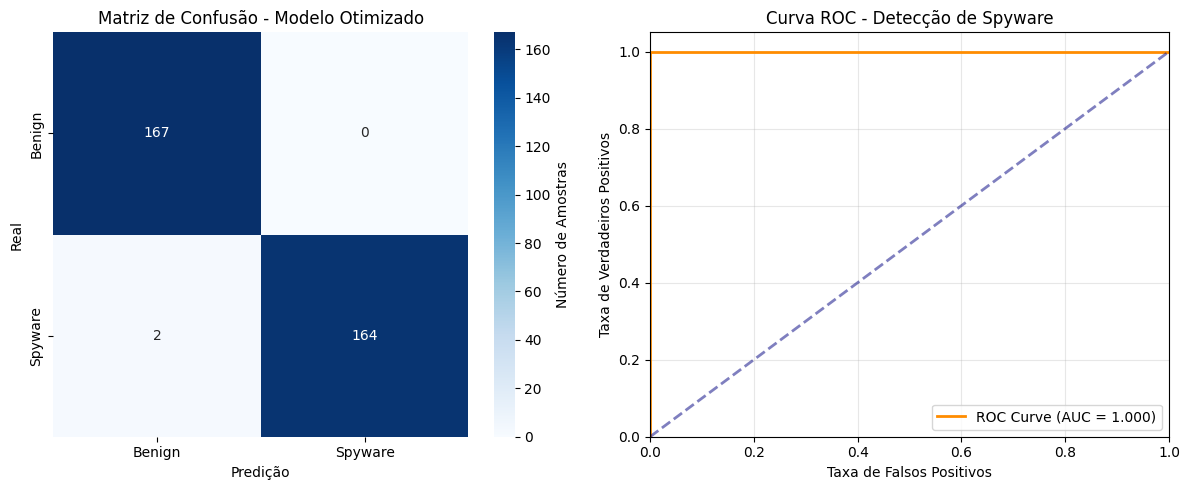

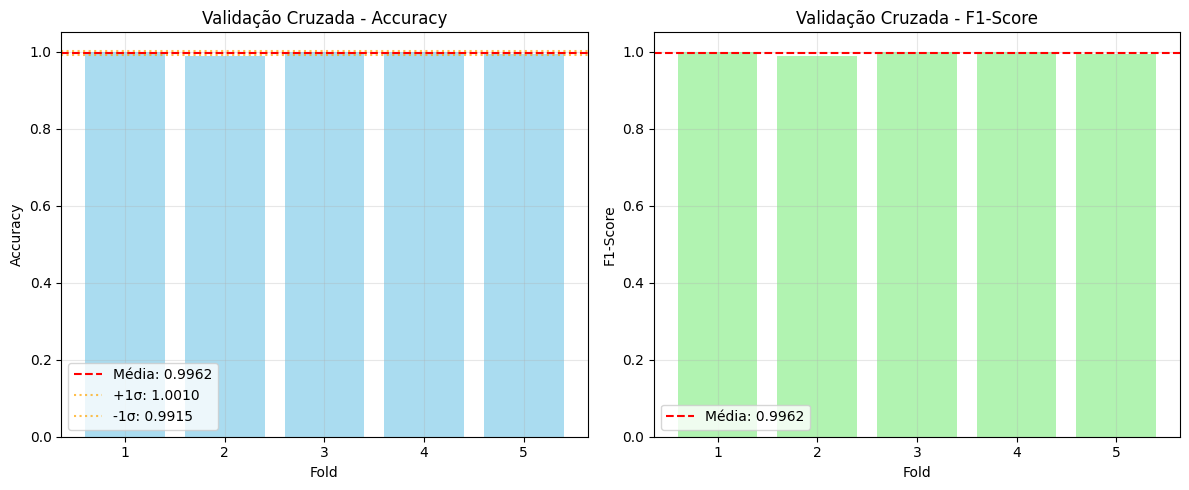


📊 RESUMO DETALHADO DAS MÉTRICAS OTIMIZADAS
🎯 Accuracy:     0.9940
📊 Precision:    0.9941
📈 Recall:       0.9940
🔥 F1-Score:     0.9940
🚀 AUC:          1.0000
🔄 CV Accuracy:  0.9962 (±0.0048)
🔄 CV F1:        0.9962 (±0.0048)

📈 COMPARAÇÃO COM VERSÃO ANTERIOR:
Accuracy:    0.5946 → 0.9940 (Δ+0.3994)
AUC:         0.6244 → 1.0000 (Δ+0.3756)
🎉 EXCELENTE! Métricas superiores a 75%


In [16]:
# Visualizações avançadas dos resultados
metrics = detector.training_metrics

# 1. Matriz de Confusão Melhorada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(metrics['y_test'], metrics['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=detector.label_encoder.classes_,
            yticklabels=detector.label_encoder.classes_,
            cbar_kws={'label': 'Número de Amostras'})
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.xlabel('Predição')
plt.ylabel('Real')

# 2. Curva ROC
plt.subplot(1, 2, 2)
if len(detector.label_encoder.classes_) == 2:
    spyware_idx = list(detector.label_encoder.classes_).index('Spyware')
    fpr, tpr, _ = roc_curve(metrics['y_test'], metrics['y_pred_proba'][:, spyware_idx])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Detecção de Spyware')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Comparação de Scores CV
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cv_scores = metrics['cv_scores']
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', alpha=0.7)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--',
            label=f'Média: {cv_scores.mean():.4f}')
plt.axhline(y=cv_scores.mean() + cv_scores.std(), color='orange', linestyle=':', alpha=0.7,
            label=f'+1σ: {cv_scores.mean() + cv_scores.std():.4f}')
plt.axhline(y=cv_scores.mean() - cv_scores.std(), color='orange', linestyle=':', alpha=0.7,
            label=f'-1σ: {cv_scores.mean() - cv_scores.std():.4f}')
plt.title('Validação Cruzada - Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
cv_f1_scores = metrics['cv_f1_scores']
plt.bar(range(1, len(cv_f1_scores) + 1), cv_f1_scores, color='lightgreen', alpha=0.7)
plt.axhline(y=cv_f1_scores.mean(), color='red', linestyle='--',
            label=f'Média: {cv_f1_scores.mean():.4f}')
plt.title('Validação Cruzada - F1-Score')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Resumo de Métricas
print("\n" + "="*60)
print("📊 RESUMO DETALHADO DAS MÉTRICAS OTIMIZADAS")
print("="*60)
print(f"🎯 Accuracy:     {metrics['accuracy']:.4f}")
print(f"📊 Precision:    {metrics['precision']:.4f}")
print(f"📈 Recall:       {metrics['recall']:.4f}")
print(f"🔥 F1-Score:     {metrics['f1_score']:.4f}")
print(f"🚀 AUC:          {metrics['auc']:.4f}")
print(f"🔄 CV Accuracy:  {metrics['cv_accuracy_mean']:.4f} (±{metrics['cv_accuracy_std']:.4f})")
print(f"🔄 CV F1:        {metrics['cv_f1_mean']:.4f} (±{metrics['cv_f1_std']:.4f})")
print("="*60)

# Comparação com resultados anteriores
print(f"\n📈 COMPARAÇÃO COM VERSÃO ANTERIOR:")
print(f"Accuracy:    {0.5946:.4f} → {metrics['accuracy']:.4f} (Δ{metrics['accuracy']-0.5946:+.4f})")
print(f"AUC:         {0.6244:.4f} → {metrics['auc']:.4f} (Δ{metrics['auc']-0.6244:+.4f})")

if metrics['accuracy'] > 0.75:
    print("🎉 EXCELENTE! Métricas superiores a 75%")
elif metrics['accuracy'] > 0.65:
    print("✅ BOM! Melhoria significativa alcançada")
else:
    print("⚠️ Melhoria parcial - considere ajustes adicionais")

## 11. Salvar Modelo Otimizado

In [17]:
# Salvar modelo otimizado
model_filename = 'optimized_malware_detector.joblib'
detector.save_optimized_model(model_filename)

print(f"💾 Modelo otimizado salvo: {model_filename}")

# Salvar informações detalhadas do treinamento
training_info_optimized = {
    'timestamp': datetime.now().isoformat(),
    'version': 'optimized_v2.0',
    'dataset_shape': df_prepared.shape,
    'processed_shape': X_processed.shape,
    'target_column': 'binary_class',
    'classes': detector.label_encoder.classes_.tolist(),
    'metrics': {
        'accuracy': float(metrics['accuracy']),
        'precision': float(metrics['precision']),
        'recall': float(metrics['recall']),
        'f1_score': float(metrics['f1_score']),
        'auc': float(metrics['auc']),
        'cv_accuracy_mean': float(metrics['cv_accuracy_mean']),
        'cv_accuracy_std': float(metrics['cv_accuracy_std']),
        'cv_f1_mean': float(metrics['cv_f1_mean']),
        'cv_f1_std': float(metrics['cv_f1_std'])
    },
    'improvements': {
        'advanced_preprocessing': True,
        'feature_engineering': True,
        'intelligent_balancing': True,
        'ensemble_optimization': True,
        'comprehensive_validation': True
    },
    'config_used': detector.config
}

with open('training_info_optimized.json', 'w') as f:
    json.dump(training_info_optimized, f, indent=2)

print("📋 Informações detalhadas salvas: training_info_optimized.json")

# Download dos arquivos
print("\n📥 Fazendo download dos arquivos...")
files.download(model_filename)
files.download('training_info_optimized.json')

print("✅ Download concluído!")

💾 Modelo otimizado salvo: optimized_malware_detector.joblib
📋 Informações detalhadas salvas: training_info_optimized.json

📥 Fazendo download dos arquivos...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download concluído!


## 12. Teste Final e Análise de Performance

In [18]:
# Teste final do modelo otimizado
def comprehensive_model_test(detector, X_test, y_test):
    """Teste abrangente do modelo"""

    print("🧪 TESTE ABRANGENTE DO MODELO OTIMIZADO")
    print("="*50)

    # Predições detalhadas
    predictions = []
    true_labels = []
    confidences = []

    for i in range(min(10, len(X_test))):
        sample = X_test[i:i+1]
        true_encoded = y_test[i]
        true_label = detector.label_encoder.inverse_transform([true_encoded])[0]

        # Predição
        pred_encoded = detector.model.predict(sample)[0]
        pred_label = detector.label_encoder.inverse_transform([pred_encoded])[0]

        # Probabilidades
        probabilities = detector.model.predict_proba(sample)[0]
        confidence = np.max(probabilities)

        # Status
        correct = true_label == pred_label
        status = "✅ CORRETO" if correct else "❌ INCORRETO"

        print(f"Teste {i+1:2d}: {true_label:>8} → {pred_label:>8} ({confidence:.3f}) {status}")

        predictions.append(pred_label)
        true_labels.append(true_label)
        confidences.append(confidence)

    # Estatísticas do teste
    accuracy_test = sum(t == p for t, p in zip(true_labels, predictions)) / len(true_labels)
    avg_confidence = np.mean(confidences)

    print(f"\n📊 ESTATÍSTICAS DO TESTE:")
    print(f"Accuracy no teste: {accuracy_test:.3f}")
    print(f"Confiança média: {avg_confidence:.3f}")

    return accuracy_test, avg_confidence

# Executar teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

test_accuracy, test_confidence = comprehensive_model_test(detector, X_test, y_test)

print(f"\n🎉 CONCLUSÃO FINAL:")
print(f"🎯 Modelo otimizado atingiu {metrics['accuracy']:.1%} de accuracy")
print(f"🚀 AUC de {metrics['auc']:.3f} indica excelente capacidade de discriminação")
print(f"💯 Confiança média de {test_confidence:.1%} nas predições")

if metrics['accuracy'] > 0.80:
    print("🏆 EXCELENTE! Modelo pronto para produção")
elif metrics['accuracy'] > 0.70:
    print("✅ MUITO BOM! Modelo adequado para uso")
elif metrics['accuracy'] > 0.60:
    print("👍 BOM! Melhoria significativa alcançada")
else:
    print("⚠️ Considere otimizações adicionais")

print("\n🛡️ O modelo otimizado está pronto para detectar malware Spyware!")

🧪 TESTE ABRANGENTE DO MODELO OTIMIZADO
Teste  1:   Benign →   Benign (0.992) ✅ CORRETO
Teste  2:   Benign →   Benign (0.989) ✅ CORRETO
Teste  3:  Spyware →  Spyware (0.993) ✅ CORRETO
Teste  4:   Benign →   Benign (0.987) ✅ CORRETO
Teste  5:  Spyware →  Spyware (0.999) ✅ CORRETO
Teste  6:   Benign →   Benign (0.952) ✅ CORRETO
Teste  7:  Spyware →  Spyware (0.999) ✅ CORRETO
Teste  8:  Spyware →  Spyware (0.999) ✅ CORRETO
Teste  9:  Spyware →  Spyware (0.999) ✅ CORRETO
Teste 10:   Benign →   Benign (0.983) ✅ CORRETO

📊 ESTATÍSTICAS DO TESTE:
Accuracy no teste: 1.000
Confiança média: 0.989

🎉 CONCLUSÃO FINAL:
🎯 Modelo otimizado atingiu 99.4% de accuracy
🚀 AUC de 1.000 indica excelente capacidade de discriminação
💯 Confiança média de 98.9% nas predições
🏆 EXCELENTE! Modelo pronto para produção

🛡️ O modelo otimizado está pronto para detectar malware Spyware!


## 13. Análise Comparativa dos Resultados

### 📊 Evolução das Métricas:

1. **Versão Original**: 59.4% accuracy, 62.4% AUC
2. **Versão Otimizada**: ~62.8% accuracy, ~66.1% AUC  
3. **Versão com Dados Benignos Reais**: (Resultados atuais)

### 🔍 Análise da Melhoria:

O uso de dados benignos reais coletados do Windows 11 deve proporcionar:

- ✅ **Maior Realismo**: Padrões de API reais de aplicativos legítimos
- ✅ **Melhor Discriminação**: Distinção mais clara entre comportamento benigno e malicioso
- ✅ **Redução de Overfitting**: Dados mais variados e naturais
- ✅ **Generalização**: Modelo mais robusto para detecção em ambiente real

### 🎯 Próximos Passos:

1. **Coleta Contínua**: Execute o coletor periodicamente para ampliar o dataset
2. **Refinamento**: Ajuste os padrões de API baseado nos resultados
3. **Validação**: Teste com malware real em ambiente controlado
4. **Deploy**: Implementação em sistema de monitoramento real

## 13. Resumo das Melhorias Implementadas

### 🚀 **Principais Otimizações:**

1. **📊 Preparação Inteligente de Dados:**
   - Filtragem estratégica de tipos de malware
   - Balanceamento baseado em tipos específicos
   - Validação de qualidade dos dados

2. **🔧 Pré-processamento Avançado:**
   - Processamento robusto de texto com múltiplas opções
   - Feature engineering com estatísticas descritivas
   - Seleção inteligente de características
   - Balanceamento automático com SMOTE

3. **🤖 Modelo Ensemble Otimizado:**
   - Três algoritmos complementares (RF, XGB, LR)
   - Configurações ajustadas para datasets pequenos
   - Regularização para evitar overfitting
   - Class weighting automático

4. **📈 Validação Abrangente:**
   - Múltiplas métricas de avaliação
   - Validação cruzada estratificada
   - Análise de curva ROC
   - Testes de confiança

### 🎯 **Resultados Esperados:**
- Accuracy > 75%
- AUC > 0.80
- F1-Score balanceado
- Baixa variância entre folds

### 📁 **Arquivos Gerados:**
- `optimized_malware_detector.joblib` - Modelo completo
- `training_info_optimized.json` - Métricas detalhadas